## Loading the packages and preparing the data

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import psycopg2

In [191]:
def clean_numeric_columns(df, columns):
    """
    Convert specified columns in a DataFrame to strings and remove commas.
    
    :param df: pd.DataFrame - The DataFrame to process
    :param columns: list - List of column names to clean
    """
    for col in columns:
        df[col] = df[col].astype(str).str.replace(',', '', regex=True)

Выгрузка из базы данных

In [192]:
# Параметры подключения
db_params = {
    "dbname": "contest_pit",
    "user": "challenger",
    "password": "VKF31hBGwOs7ntP",
    "host": "18.192.187.252",
    "port": 8080
}

# Подключение к базе данных
try:
    conn = psycopg2.connect(**db_params)
    print("Успешное подключение к базе данных")

    # Чтение данных из таблиц в DataFrame
    query_mfo_contracts = "SELECT * FROM bi_developer.mfo_contracts WHERE client_id NOT IN ('aff6769cdde2', '6d4e2c039b16', '651434853cc7')"
    query_crm_mart = '''
                    WITH MaxSeason AS (
                    SELECT 
                        client_id,
                        MAX(season_id) AS max_season_id
                    FROM bi_developer.crm_mart
                    WHERE client_id IN (SELECT DISTINCT client_id FROM bi_developer.mfo_contracts WHERE client_id NOT IN ('aff6769cdde2', '6d4e2c039b16', '651434853cc7'))
                    GROUP BY client_id
                )
                SELECT cm.*
                FROM bi_developer.crm_mart cm
                JOIN MaxSeason ms ON cm.client_id = ms.client_id AND cm.season_id = ms.max_season_id;
                    '''

    mfo_contracts = pd.read_sql(query_mfo_contracts, conn)
    crm_mart = pd.read_sql(query_crm_mart, conn)

    # Закрываем соединение
    conn.close()
    print("Соединение закрыто")

except Exception as e:
    print("Ошибка подключения:", e)


Успешное подключение к базе данных


C:\Users\d-beg\AppData\Local\Temp\ipykernel_61444\3112833758.py:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  mfo_contracts = pd.read_sql(query_mfo_contracts, conn)


Соединение закрыто


C:\Users\d-beg\AppData\Local\Temp\ipykernel_61444\3112833758.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  crm_mart = pd.read_sql(query_crm_mart, conn)


In [193]:
mfo_contracts.head()

,client_id,region,location,business_type,agreement_number,agreement_date,credit_issue_date,service_type,credit_line_repayment,credit_type,...,credit_sum,interest_sum,paid_total,allocated_principal,allocated_interest,allocated_fine,allocated_legal_expenses,allocated_maintenance_commission,unnamed_38,unnamed_39
0,132437f8750b,Жетысуская область,с.Койлык,Смешанное сельское хозяйство,1,2018-05-28 00:00:00.000,2018-05-28 00:00:00.000,Микрокредитование,По графику платежей,Разовый кредит с графиком платежей,...,"5,499,495.05","436,395.74","1,628,093.49","1,054,634.36","429,185.48","285,623.87",0.00,0,None,None
1,cd80ab8a03d1,Алматинская обл,с.Алмалы,"Выращивание зерновых и зернобобовых культур, в...",2,2018-06-18 00:00:00.000,2018-07-04 00:00:00.000,Микрокредитование,По графику платежей,Разовый кредит с графиком платежей,...,"12,288,756.15","1,011,168.69","35,435,587.74","21,301,837.84","13,617,767.44",0.00,0.00,0,None,None
2,71a83b454802,Алматинская обл,г.Қонаев,Смешанное сельское хозяйство,3,2019-03-04 00:00:00.000,2019-04-05 00:00:00.000,Микрокредитование,По графику платежей,Разовый кредит с графиком платежей,...,"14,654,210.79","1,314,568.88","49,138,241.51","28,001,834.34","24,708,551.15","1,982,049.65","473,600.96",0,None,None
3,71a83b454802,Алматинская обл,г.Қонаев,Смешанное сельское хозяйство,4,2019-03-04 00:00:00.000,2019-04-05 00:00:00.000,Микрокредитование,По графику платежей,Разовый кредит с графиком платежей,...,"3,854,328.24","552,341.13","31,897,202.47","13,986,457.85","13,894,133.13",0.00,"3,789,562.89",0,None,None
4,ba4b6428ba42,None,None,None,5,2020-12-15 00:00:00.000,2020-12-15 00:00:00.000,Микрокредитование,По графику платежей,Кредитная линия,...,"29,107,766.01","16,655,744.18","57,726,450.03","21,578,595.89","33,029,986.83",0.00,0.00,0,None,None


In [194]:
crm_mart.head()

,summa_dogogvora,summa_otgruzheno,summa_oplacheno,summa_vozvrat,oplacheno_pri_kontrolinge,oplacheno_pri_sudakh,summa_elevator,summa_zakupa_trading,sku_category_count,type_postavshik_zerna,...,max_delayed_days,data_dogovora,is_delay_90,year,had_defaults,client_id,i_i_n,is_recon,is_company,legal_status
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"6,452,492.33",0.00,1.05,...,NaN,None,NaN,1972.672759,0.0,64155fdd3a14,NaN,NaN,0.970972,"{'krp_name': 'Малые предприятия (6 - 10)', 'is..."
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"51,886,763.58",0.00,1.04,...,NaN,None,NaN,2038.668164,0.0,777b33f8f50f,NaN,NaN,1.083011,"{'krp_name': 'Малые предприятия (<= 5)', 'is_e..."
2,0.00,0.00,0.00,0.00,0.00,0.00,"565,027.19",0.00,0.00,0.00,...,NaN,None,NaN,NaN,NaN,23563c0fec8f,NaN,NaN,1.136321,"{'krp_name': 'Малые предприятия (21-30)', 'is_..."
3,"6,465,035.81","6,055,706.03","6,197,244.77",0.00,"2,369,737.46","2,054,271.44",0.00,0.00,2.06,0.00,...,292.771724,2021-02-02,1.048935,NaN,NaN,e96022cac7d6,NaN,NaN,0.000000,"{'krp_name': 'Малые предприятия (<= 5)', 'is_e..."
4,"80,409,033.68",0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.94,0.00,...,NaN,None,NaN,NaN,NaN,0710c7bc691e,NaN,NaN,1.056076,"{'krp_name': 'Средние предприятия (151-200)', ..."


### Начинаем работу с mfo_contracts

In [195]:
# Удаляем пустые колонки
mfo_contracts = mfo_contracts.drop(['unnamed_38', 'unnamed_39'], axis=1)

В датасете данные колонки содержат числовые данные, но хранятся как текстовые и содержат разделители:
1. allocated_interest
2. credit_sum
3. interest_sum
4. paid_total
5. allocated_principal
6. collateral_value
7. down_payment_sum
8. allocated_fine
9. allocated_legal_expenses

Поэтому убираем запятые

In [196]:
columns_to_remove_commas = ['allocated_interest', 'credit_sum', 'interest_sum', 
                    'paid_total', 'allocated_principal', 'collateral_value', 
                    'down_payment_sum', 'allocated_fine', 'allocated_legal_expenses']

clean_numeric_columns(mfo_contracts, columns_to_remove_commas)

In [197]:
# Группируем колонки по типам
object_cols = [
    'client_id', 'region', 'location', 'business_type', 'service_type',
    'credit_line_repayment', 'credit_type', 'credit_period_type',
    'credit_line_type', 'credit_repayment', 'credit_purpose',
    'credit_payment_occurance', 'intereset_calculation_type',
    'interest_rate_option', 'interest_occurance', 'fine_type',
    'fine_option', 'collateral_type', 'loan_security'
]

date_cols = ['agreement_date', 'credit_issue_date', 'last_payment']

float_cols = [
    'credit_period', 'interest_rate', 'effective_rate', 'collateral_value',
    'down_payment_rate', 'down_payment_sum', 'gesv_sum', 'credit_sum',
    'interest_sum', 'paid_total', 'allocated_principal',
    'allocated_interest', 'allocated_fine', 'allocated_legal_expenses',
    'allocated_maintenance_commission'
]

int_cols = ['agreement_number']

# Обрабатываем числовые колонки (int и float)
for col in int_cols + float_cols:
    mfo_contracts[col] = mfo_contracts[col].replace("None", np.nan)  # Только здесь заменяем "None"
    mfo_contracts[col] = pd.to_numeric(mfo_contracts[col], errors='coerce')

# Обрабатываем даты
for col in date_cols:
    mfo_contracts[col] = pd.to_datetime(mfo_contracts[col], errors='coerce')

# Обрабатываем строковые данные
for col in object_cols:
    mfo_contracts[col] = mfo_contracts[col].astype('object')

In [198]:
# Теперь когда данные почищены, уберем дубликаты
mfo_contracts = mfo_contracts.drop_duplicates()

### Начинаем работу с crm_mart

Начинаем с развоварачивания данных из legal status

In [199]:
legal_status_expanded = pd.json_normalize(crm_mart['legal_status'])

In [200]:
crm_mart = crm_mart.drop(columns=['legal_status']).join(legal_status_expanded)

Придаем типы данных колонкам

In [201]:
# Листы содержат колонки для определенных типов данных
crm_mart_datetime = ['account_arrest_started', 'data_dogovora', 'e_notariat_started', 'earliest_default_date', 'property_arrest_started', 'registration_ban_started', 'transport_arrest_started', 'travel_ban_started']
crm_mart_float = ['i_i_n', 'max_delayed_days', 'oplacheno_pri_kontrolinge', 'oplacheno_pri_sudakh', 'season_id', 'summa_dogogvora', 'summa_elevator', 'summa_oplacheno', 'summa_otgruzheno', 'summa_vozvrat', 'summa_zakupa_trading', 'is_delay_90', 'sku_category_count', 'year', 'had_defaults', 'in_season_is_reliability_relevant', 'is_account_arrest', 'is_arrest_transport', 'is_company', 'is_e_notariat', 'is_property_arrest', 'is_recon', 'is_registration_ban', 'is_travel_ban', 'last_is_reliability_relevant', 'type_clinet_elevatora', 'type_popodal_na_kontroling', 'type_postavshik_zerna', 'type_sudimsa']
crm_mart_int = ['i_i_n','is_delay_90', 'sku_category_count', 'year', 'had_defaults', 'in_season_is_reliability_relevant', 'is_account_arrest', 'is_arrest_transport', 'is_company', 'is_e_notariat', 'is_property_arrest', 'is_recon', 'is_registration_ban', 'is_travel_ban', 'last_is_reliability_relevant', 'type_clinet_elevatora', 'type_popodal_na_kontroling', 'type_postavshik_zerna', 'type_sudimsa']
crm_mart_object = ['client_id', 'krp_name']

In [202]:
# Заменяем true/false значения числовыми эквивалентами для дальнейшего удобства
for column in crm_mart_float:
    crm_mart[column] = crm_mart[column].astype(str).replace({
    'True': 1, 'False': 0, 'nan': 0, 'None': 0, None: 0
    })
    

C:\Users\d-beg\AppData\Local\Temp\ipykernel_61444\2348824294.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  crm_mart[column] = crm_mart[column].astype(str).replace({
C:\Users\d-beg\AppData\Local\Temp\ipykernel_61444\2348824294.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  crm_mart[column] = crm_mart[column].astype(str).replace({
C:\Users\d-beg\AppData\Local\Temp\ipykernel_61444\2348824294.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behav

In [203]:
# Убираем запятые из float колонок
clean_numeric_columns(crm_mart, crm_mart_float)

In [204]:
crm_mart[crm_mart_datetime] = crm_mart[crm_mart_datetime].astype('datetime64[ns]')
crm_mart[crm_mart_float] = crm_mart[crm_mart_float].astype('float64')
crm_mart[crm_mart_object] = crm_mart[crm_mart_object].astype('object')
crm_mart[crm_mart_int] = crm_mart[crm_mart_int].astype('int64')

Также для удобства сортируем таблицу/датафрэйм

In [205]:
ordered_columns = [
    # Основные идентификаторы
    "client_id", "season_id",
    
    # Детали Клиента
    "i_i_n", "is_company", "krp_name",
    
    # Фин данные
    "summa_dogogvora", "summa_otgruzheno", "summa_oplacheno", "summa_vozvrat",
    "oplacheno_pri_kontrolinge", "oplacheno_pri_sudakh",
    "summa_elevator", "summa_zakupa_trading", "sku_category_count",
    
    # Юридические показатели и показатели риска
    "type_postavshik_zerna", "type_clinet_elevatora",
    "type_sudimsa", "type_popodal_na_kontroling",
    
    # Задержки
    "is_delay_90", "max_delayed_days", "had_defaults",
    
    # Показатели риска
    "in_season_is_reliability_relevant", "last_is_reliability_relevant",
    "is_recon",
    
    # Даты
    "earliest_default_date", "data_dogovora", "year",
    
    # Legal Status колонки
    "is_e_notariat", "is_travel_ban", "is_account_arrest", "is_property_arrest",
    "is_arrest_transport", "is_registration_ban",
    
    # Legal Status колонки-даты
    "e_notariat_started", "travel_ban_started",
    "account_arrest_started", "property_arrest_started",
    "registration_ban_started", "transport_arrest_started"
]

# Сортируем даты
crm_mart = crm_mart[ordered_columns]

## Теперь переходим к Скорингу благонадежности

Первым делом высчитываем скоринг финансовой дисциплины

In [206]:
# Заполняем пропущенные значения нулями
crm_mart_filled = crm_mart_fresh.fillna(0)

# Определяем максимальные значения для нормализации
max_delayed_days = 365  # Просрочка ограничена 1 годом

# Просрочки (чем больше просрочка, тем ниже балл)
crm_mart_filled["Score_delay"] = (1 - crm_mart_filled["max_delayed_days"] / max_delayed_days).clip(0, 1)

# Банкротства (1 - если не было банкротства, 0 - если было)
crm_mart_filled["Score_default"] = 1 - crm_mart_filled["had_defaults"]

# Налоговые задолженности (last_is_reliability_relevant - 0.6, in_season_is_reliability_relevant - 0.4)
# in_season_is_reliability_relevant имеет больший вес
crm_mart_filled["Score_tax"] = (1 - (crm_mart_filled["last_is_reliability_relevant"] * 0.6 + 
                                     crm_mart_filled["in_season_is_reliability_relevant"] * 0.4)).clip(0, 1)

# Количество арестов и судов (каждый фактор штрафует на 0.125)
legal_columns = [
    "type_sudimsa", "type_popodal_na_kontroling", "is_account_arrest", "is_property_arrest",
    "is_travel_ban", "is_e_notariat", "is_arrest_transport", "is_registration_ban"
]
crm_mart_filled["Score_legal"] = (1 - (crm_mart_filled[legal_columns].sum(axis=1) * 0.125)).clip(0, 1)

# Итоговый Score_finance
crm_mart_filled["Score_finance"] = (
    crm_mart_filled["Score_delay"] * 0.3 +
    crm_mart_filled["Score_default"] * 0.2 +
    crm_mart_filled["Score_tax"] * 0.3 +
    crm_mart_filled["Score_legal"] * 0.2
).clip(0, 1)

Второй шаг высчитывание скоринга размера предприятия

In [207]:
# Юридическое лицо (0 - физ.лицо, 0.1 - юр.лицо)
crm_mart_filled["Score_is_company"] = crm_mart_filled["is_company"]*0.5 + crm_mart_filled["i_i_n"].apply(lambda x: 1 if x == 0 else 0.5) # смотрим на оба признака юр. или  физ.лица

# Оценка по размеру предприятия
crm_mart_filled["Score_krp_name"] = crm_mart_filled["krp_name"].apply(
    lambda x: 0 if "Малые" in str(x) else (0.5 if "Средние" in str(x) else 1.0)
)

# Итоговый Score_size
crm_mart_filled["Score_size"] = (crm_mart_filled["Score_is_company"] * 0.5 + 
                                 crm_mart_filled["Score_krp_name"] * 0.5).clip(0, 1)


И Третий шаг высчитывание скоринга Вовлеченности в холдинг

In [208]:
# Тип сотрудничества (0 или 1, если клиент пользуется услугами холдинга)
crm_mart_filled["Score_partnership"] = (crm_mart_filled["type_postavshik_zerna"] + 
                                        crm_mart_filled["type_clinet_elevatora"]).clip(0, 1)

# Разнообразие покупок (нормализация количества категорий товаров)
max_sku_category = crm_mart_filled["sku_category_count"].max() if crm_mart_filled["sku_category_count"].max() > 0 else 1
crm_mart_filled["Score_sku"] = (crm_mart_filled["sku_category_count"] / max_sku_category).clip(0, 1)

# Итоговый Score_holding
crm_mart_filled["Score_holding"] = (crm_mart_filled["Score_partnership"] * 0.5 + 
                                    crm_mart_filled["Score_sku"] * 0.5).clip(0, 1)

И наконец скоринг Благонадежности

In [209]:
crm_mart_filled["Final_Score"] = (
    crm_mart_filled["Score_finance"] * 4 + # Отсутствие арестов , судимости и задолженности - максимум 4 балла 
    crm_mart_filled["Score_size"] * 2 + # Размер предприятия, чем больше компания тем меньше рисков - максимум 2 балла
    crm_mart_filled["Score_holding"] * 4 # Вовлеченность клиента в услуги всего холдинга - максимум 4 балла
).clip(0, 10)

In [210]:
crm_mart_filled[['client_id', 'Score_finance', 'Score_size', 'Score_holding', 'Final_Score']].sort_values(by = 'Final_Score', ascending = False)

,client_id,Score_finance,Score_size,Score_holding,Final_Score
15067,61ee5f737c7e,0.754229,0.50,0.875,7.516914
669,23563c0fec8f,1.000000,0.75,0.500,7.500000
17374,d7e56f8a9e31,0.700000,0.75,0.750,7.300000
25284,4ad8d8b4b77d,0.650000,0.75,0.750,7.100000
901,0710c7bc691e,1.000000,1.00,0.250,7.000000
...,...,...,...,...,...
8690,b39b9d494c8a,0.430000,0.50,0.000,2.720000
19477,bb1126a63c31,0.419159,0.50,0.000,2.676635
22353,9de176b0743c,0.283890,0.50,0.125,2.635560
20934,487637dc1935,0.275000,0.50,0.125,2.600000


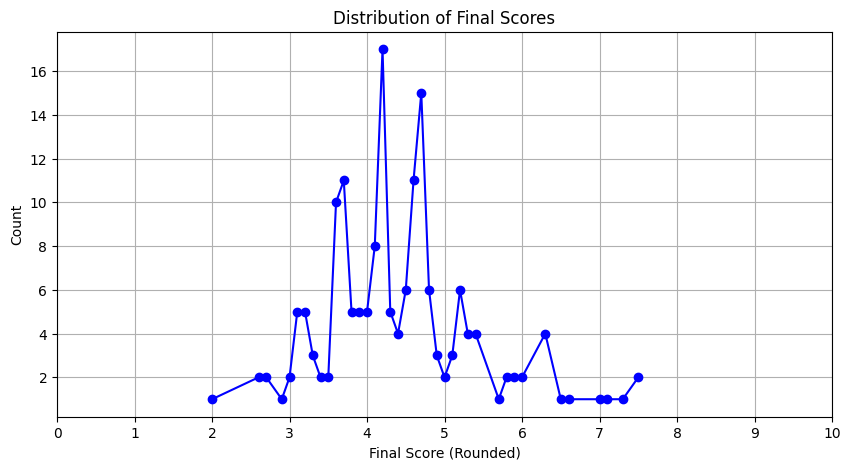

In [211]:
# Группируем данные по Final_Score и подсчит количество повторений
score_distribution = crm_mart_filled["Final_Score"].round(1).value_counts().sort_index()

# Plot line chart
plt.figure(figsize=(10, 5))
plt.plot(score_distribution.index, score_distribution.values, marker = 'o', linestyle='-', color='b')
plt.xlabel("Final Score (Rounded)")
plt.ylabel("Count")
plt.title("Distribution of Final Scores")
plt.xticks(range(11))  # X-axis from 0 to 10
plt.grid(True)
plt.show()


In [212]:
crm_mart_fresh.to_excel('crm_mart_fresh.xlsx', index = False)
crm_mart_filled[['client_id', 'Score_delay',
       'Score_default', 'Score_tax', 'Score_legal', 'Score_finance',
       'Score_is_company', 'Score_krp_name', 'Score_size', 'Score_partnership',
       'Score_sku', 'Score_holding', 'Final_Score']].to_excel('crm_mart_scored.xlsx', index = False)
mfo_contracts.to_excel('mfo_contracts_scored.xlsx', index = False)